<a href="https://colab.research.google.com/github/MauroTalamantes/RuidoMorfologiaOtsuBinarizacion/blob/main/RuidoMorfologiaOtsuBinarizacionNML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import cv2, numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import closing, opening, disk
from skimage.filters import threshold_otsu

In [ ]:
# Leer y visualizar imagenes
img_bgr = cv2.imread('Colab Notebooks/0010-M.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

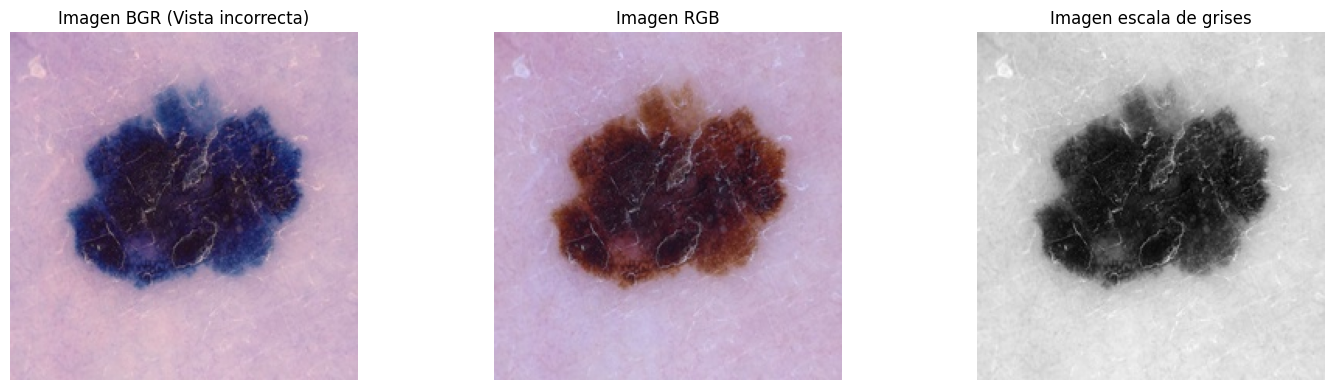

In [ ]:
plt.figure(figsize=(15,4))

#Imagen BGR
plt.subplot(1,3,1)
plt.imshow(img_bgr)
plt.title('Imagen BGR (Vista incorrecta)')
plt.axis('off')


#Imagen RGB
plt.subplot(1,3,2)
plt.imshow(img_rgb)
plt.title('Imagen RGB')
plt.axis('off')

#Imagen escala de grises
plt.subplot(1,3,3)
plt.imshow(gray, cmap = 'gray')
plt.title('Imagen escala de grises')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from skimage.restoration import estimate_sigma
sigma_est = estimate_sigma(gray, channel_axis=None, average_sigmas=True)
print(f"Nivel estimado de ruido = {sigma_est}")

Nivel estimado de ruido = 1.543783099835943


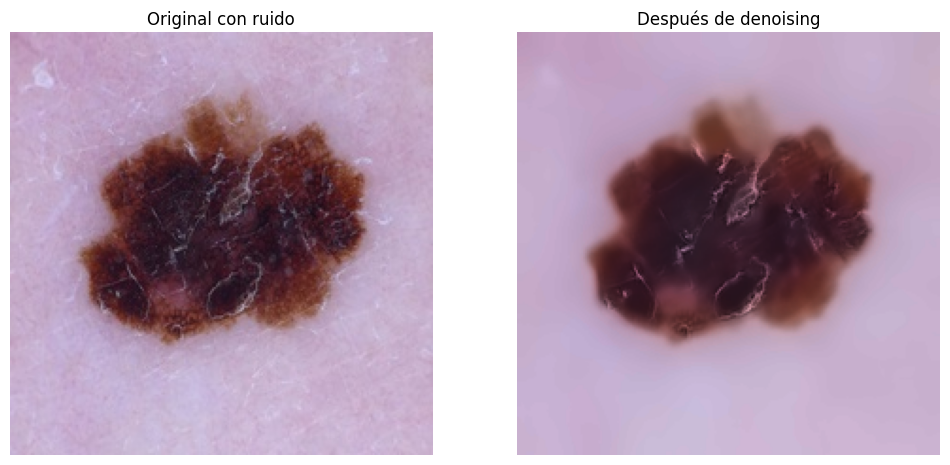

In [ ]:
# Filtro Non-Local Means (mejor para ruido alto)
denoised = cv2.fastNlMeansDenoisingColored(img_bgr, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21)
denoised_rgb = cv2.cvtColor(denoised, cv2.COLOR_BGR2RGB)

# Mostrar comparación
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original con ruido")
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Después de denoising")
plt.imshow(denoised_rgb)
plt.axis('off')
plt.show()

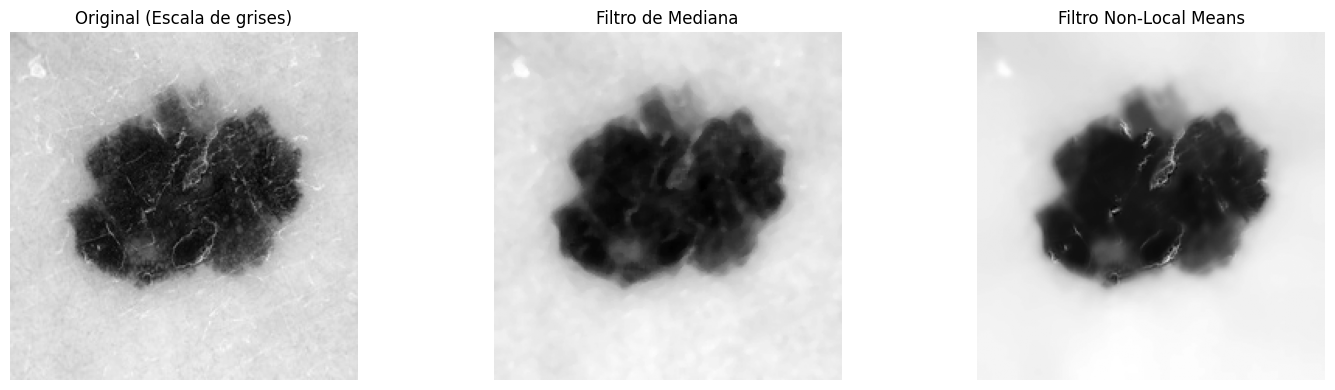

In [ ]:
# Filtro de Mediana
median_filtered = cv2.medianBlur(gray, 5)
# Non-Local Means para escala de grises
nlm_filtered = cv2.fastNlMeansDenoising(gray, None, h=10, templateWindowSize=7, searchWindowSize=31)

# Visualización
plt.figure(figsize=(15,4))

# Imagen original en grises
plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original (Escala de grises)')
plt.axis('off')

# Filtro de Mediana
plt.subplot(1, 3, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Filtro de Mediana')
plt.axis('off')

# Filtro Non-Local Means
plt.subplot(1, 3, 3)
plt.imshow(nlm_filtered, cmap='gray')
plt.title('Filtro Non-Local Means')
plt.axis('off')

plt.tight_layout()
plt.show()

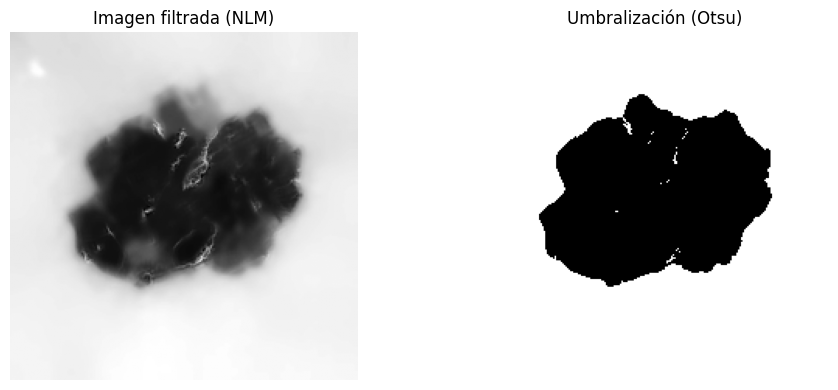

In [ ]:
# Aplicamos Otsu sobre la imagen denoised
_, otsu_thresh = cv2.threshold(
    nlm_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(nlm_filtered, cmap='gray')
plt.title('Imagen filtrada (NLM)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Umbralización (Otsu)')
plt.axis('off')
plt.tight_layout()
plt.show()

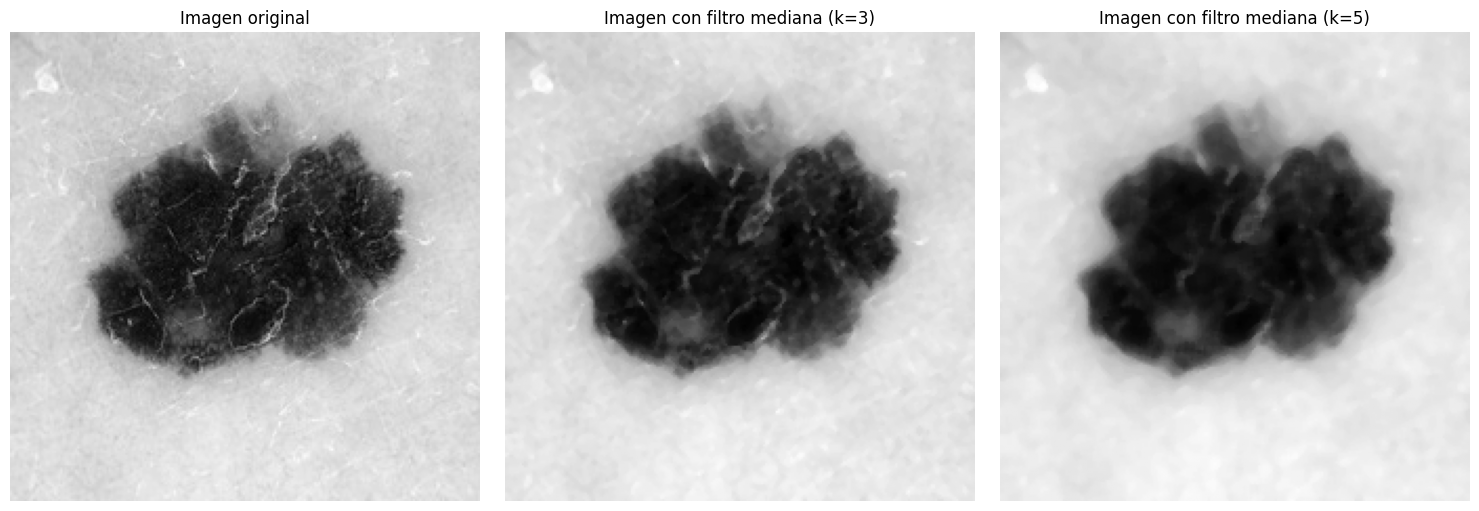

In [ ]:
# Filtro mediana
gray_med_3 = cv2.medianBlur(gray, 3)
gray_med_5 = cv2.medianBlur(gray, 5)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap = 'gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gray_med_3, cmap = 'gray')
plt.title('Imagen con filtro mediana (k=3)')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gray_med_5, cmap = 'gray')
plt.title('Imagen con filtro mediana (k=5)')
plt.axis('off')

plt.tight_layout()
plt.show()

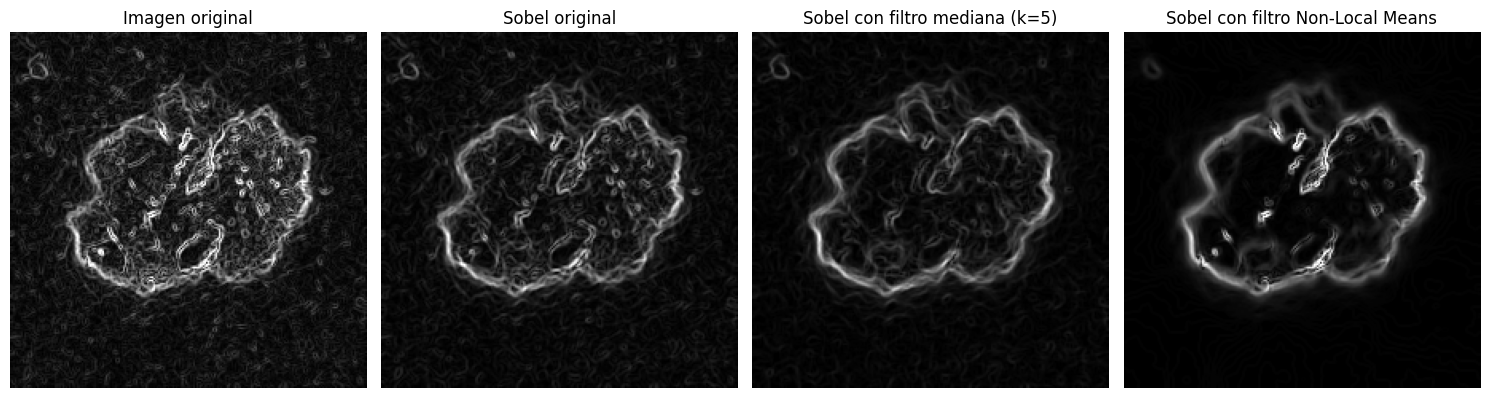

In [ ]:
def aplica_sobel(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    sobel_mag = np.sqrt(sobelx**2 + sobely**2)
    return np.uint8(np.clip(sobel_mag, 0, 255))

sobel_original = aplica_sobel(gray)
sobel_3 = aplica_sobel(gray_med_3)
sobel_5 = aplica_sobel(gray_med_5)
nlmsobel = aplica_sobel(nlm_filtered)

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(sobel_original, cmap = 'gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(sobel_3, cmap = 'gray')
plt.title('Sobel original')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(sobel_5, cmap = 'gray')
plt.title('Sobel con filtro mediana (k=5)')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(nlmsobel, cmap = 'gray')
plt.title('Sobel con filtro Non-Local Means')
plt.axis('off')

plt.tight_layout()
plt.show()

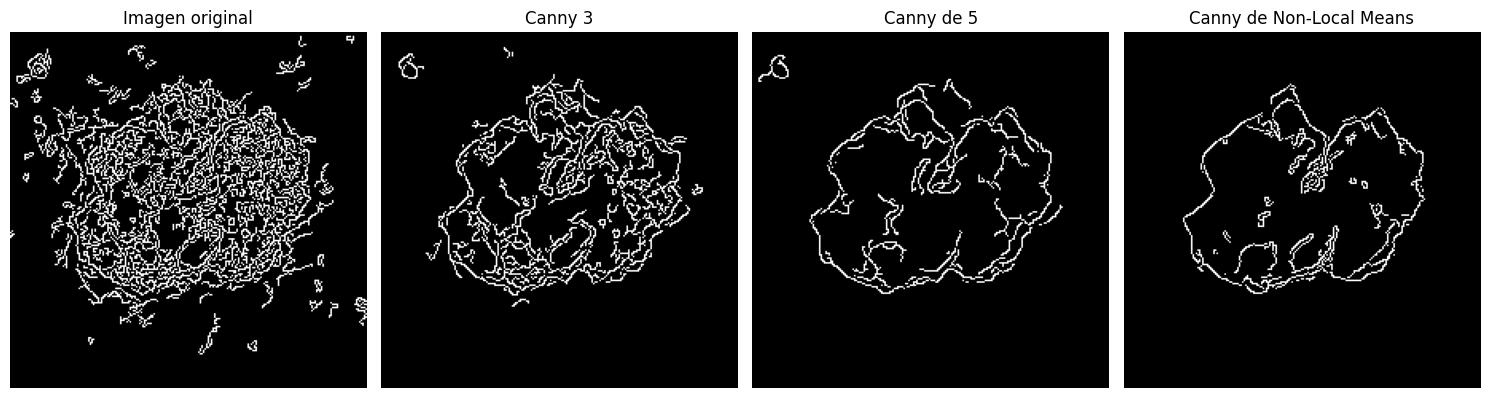

In [ ]:
# Filtro canny
# Ajustar los valores probando visualmente
canny_original = cv2.Canny(gray, 30, 90)
canny_3 = cv2.Canny(gray_med_3, 30, 90)
canny_5 = cv2.Canny(gray_med_5, 30, 90)
canny_nlm = cv2.Canny(nlm_filtered, 30, 90)

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
plt.imshow(canny_original, cmap = 'gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(canny_3, cmap = 'gray')
plt.title('Canny 3')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(canny_5, cmap = 'gray')
plt.title('Canny de 5')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(canny_nlm, cmap = 'gray')
plt.title('Canny de Non-Local Means')
plt.axis('off')

plt.tight_layout()
plt.show()

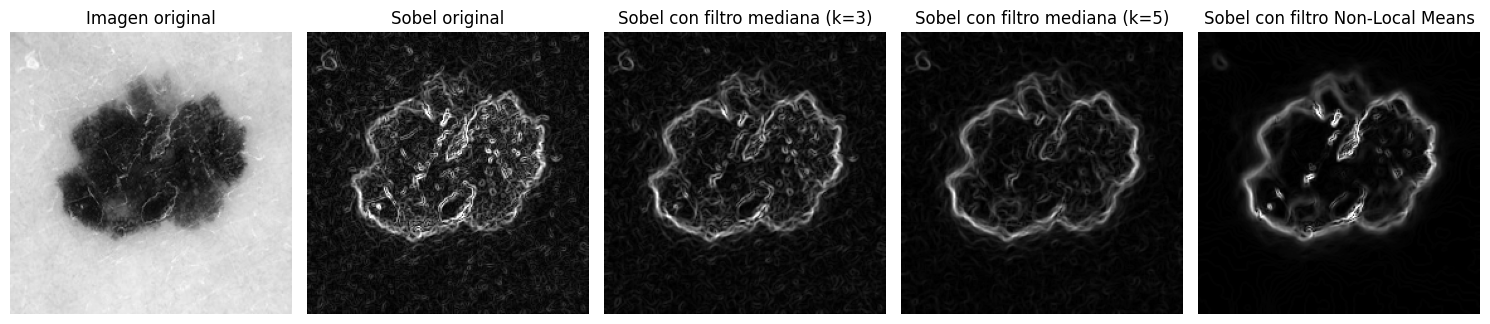

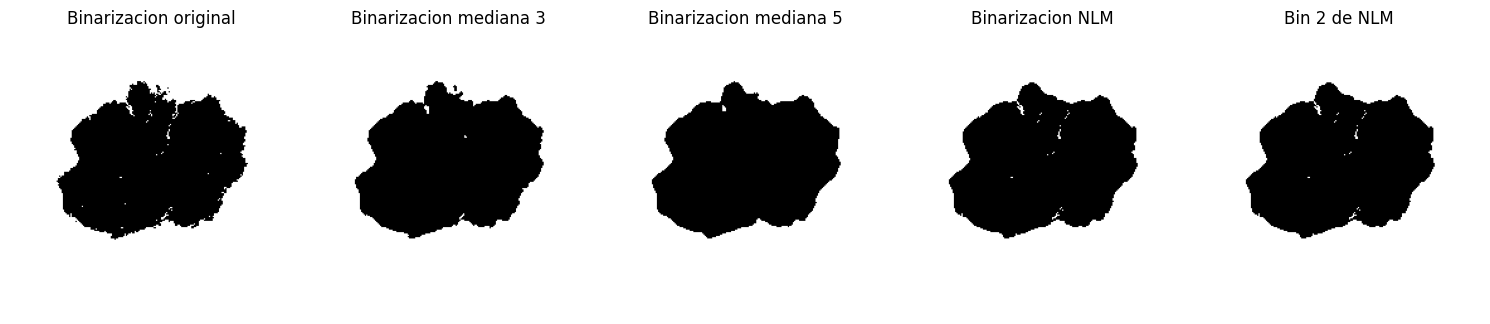

In [ ]:
# Comparativa de Otsu, Sobel con filtros de mediana
mediana3 = cv2.medianBlur(gray, 3)
mediana5 = cv2.medianBlur(gray, 5)
nlm = cv2.fastNlMeansDenoising(gray, None, h=10, templateWindowSize=7, searchWindowSize=31)

#Umbral de otsu
otsu_th_gray = threshold_otsu(gray)
otsu_th_med3 = threshold_otsu(mediana3)
otsu_th_med5 = threshold_otsu(mediana5)
otsu_th_nlm = threshold_otsu(nlm)

#Aplicar binarizacion con otsu
otsu_bin_gray = (gray > otsu_th_gray).astype(np.uint8) * 255
otsu_bin_med3 = (mediana3 > otsu_th_med3).astype(np.uint8) * 255
otsu_bin_med5 = (mediana5 > otsu_th_med5).astype(np.uint8) * 255
otsu_bin_nlm = (nlm > otsu_th_nlm).astype(np.uint8) * 255

_, otsu_bin_nlm2 = cv2.threshold(
    nlm, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

sobel_gray = aplica_sobel(gray)
sobel_med3 = aplica_sobel(mediana3)
sobel_med5 = aplica_sobel(mediana5)
sobel_nlm = aplica_sobel(nlm)

plt.figure(figsize=(15,5))
plt.subplot(1,5,1)
plt.imshow(gray, cmap = 'gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(sobel_gray, cmap = 'gray')
plt.title('Sobel original')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(sobel_med3, cmap = 'gray')
plt.title('Sobel con filtro mediana (k=3)')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(sobel_med5, cmap = 'gray')
plt.title('Sobel con filtro mediana (k=5)')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(sobel_nlm, cmap = 'gray')
plt.title('Sobel con filtro Non-Local Means')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,5,1)
plt.imshow(otsu_bin_gray, cmap='gray')
plt.title('Binarizacion original')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(otsu_bin_med3, cmap='gray')
plt.title('Binarizacion mediana 3')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(otsu_bin_med5, cmap='gray')
plt.title('Binarizacion mediana 5')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(otsu_bin_nlm, cmap='gray')
plt.title('Binarizacion NLM')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(otsu_bin_nlm, cmap='gray')
plt.title('Bin 2 de NLM')
plt.axis('off')


plt.tight_layout()
plt.show()

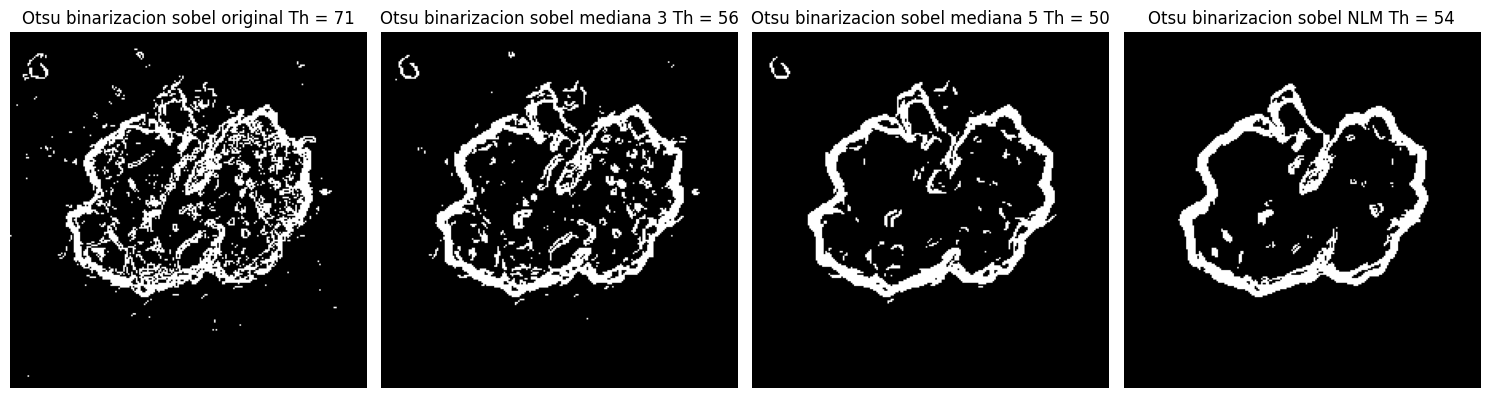

In [ ]:
def sobel_mag(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    sobel_mag = np.sqrt(sobelx**2 + sobely**2)
    return np.uint8(np.clip(sobel_mag, 0, 255))

sobel_orig = sobel_mag(gray)
sobel_med3 = sobel_mag(mediana3)
sobel_med5 = sobel_mag(mediana5)
sobel_nlm = sobel_mag(nlm)

# Aplicar umbral de otsu sobre la mag del gradiente de sobel
otsu_th_sobel_orig = threshold_otsu(sobel_orig)
otsu_bin_sobel_orig = (sobel_orig > otsu_th_sobel_orig)

otsu_th_sobel_med3 = threshold_otsu(sobel_med3)
otsu_bin_sobel_med3 = (sobel_med3 > otsu_th_sobel_med3)

otsu_th_sobel_med5 = threshold_otsu(sobel_med5)
otsu_bin_sobel_med5 = (sobel_med5 > otsu_th_sobel_med5)

otsu_th_sobel_nlm = threshold_otsu(sobel_nlm)
otsu_bin_sobel_nlm = (sobel_nlm > otsu_th_sobel_nlm)

fig, axs = plt.subplots(1, 4, figsize=(15, 7))

axs[0].imshow(otsu_bin_sobel_orig, cmap='gray')
axs[0].set_title(f'Otsu binarizacion sobel original Th = {otsu_th_sobel_orig:0.0f}')
axs[0].axis('off')

axs[1].imshow(otsu_bin_sobel_med3, cmap='gray')
axs[1].set_title(f'Otsu binarizacion sobel mediana 3 Th = {otsu_th_sobel_med3:0.0f}')
axs[1].axis('off')

axs[2].imshow(otsu_bin_sobel_med5, cmap='gray')
axs[2].set_title(f'Otsu binarizacion sobel mediana 5 Th = {otsu_th_sobel_med5:0.0f}')
axs[2].axis('off')

axs[3].imshow(otsu_bin_sobel_nlm, cmap='gray')
axs[3].set_title(f'Otsu binarizacion sobel NLM Th = {otsu_th_sobel_nlm:0.0f}')
axs[3].axis('off')

plt.tight_layout()
plt.show()

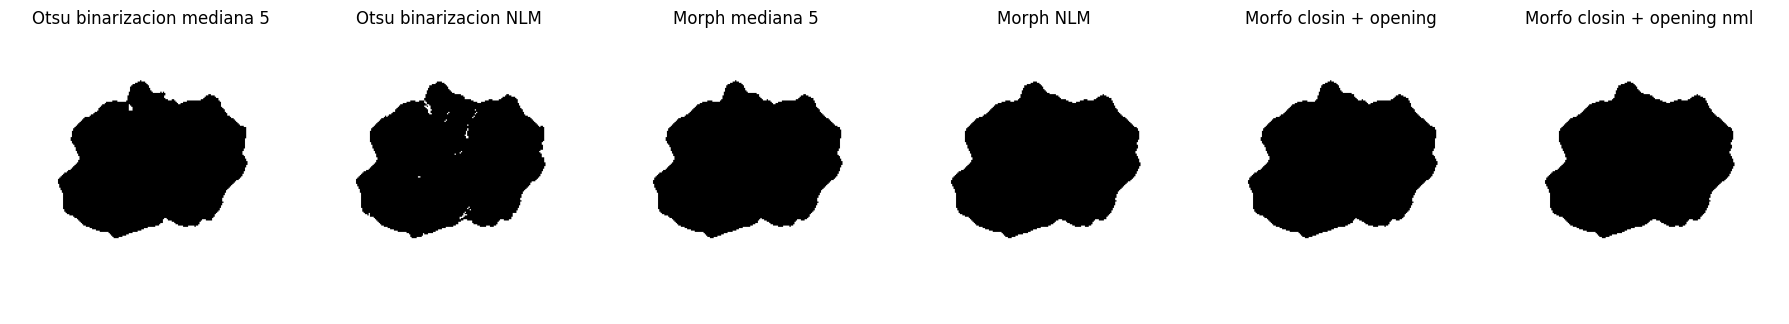

In [ ]:
from typing_extensions import final
gray_med5 = cv2.medianBlur(gray, 5)

gray_nml = cv2.fastNlMeansDenoising(gray, None, h=10, templateWindowSize=7, searchWindowSize=31)

#Otsu sobre la imagen suavizada
_,otsu_bin_gray_med5 = cv2.threshold(
    gray_med5, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

otsu_bool = otsu_bin_gray_med5 > 0

otsu_opened = opening(otsu_bool, disk(2))
otsu_closed = closing(otsu_opened, disk(3))

# Convertimos nuevamente a uint8 para visualizar
final_morph = (otsu_closed * 255).astype(np.uint8)

_,ostsu_bin_gray_nml = cv2.threshold(
    gray_nml, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

otsu_bool_nml = ostsu_bin_gray_nml > 0

otsu_opened_nml = opening(otsu_bool_nml, disk(2))
otsu_closed_nml = closing(otsu_opened_nml, disk(3))

final_morph_nml = (otsu_closed_nml * 255).astype(np.uint8)

fig, axs = plt.subplots(1, 6, figsize=(18, 5))

axs[0].imshow(otsu_bin_gray_med5, cmap='gray')
axs[0].set_title('Otsu binarizacion mediana 5')
axs[0].axis('off')

axs[1].imshow(ostsu_bin_gray_nml, cmap='gray')
axs[1].set_title('Otsu binarizacion NLM')
axs[1].axis('off')

axs[2].imshow(final_morph, cmap='gray')
axs[2].set_title('Morph mediana 5')
axs[2].axis('off')

axs[3].imshow(final_morph_nml, cmap='gray')
axs[3].set_title('Morph NLM')
axs[3].axis('off')

axs[4].imshow(otsu_closed, cmap='gray')
axs[4].set_title('Morfo closin + opening')
axs[4].axis('off')

axs[5].imshow(otsu_closed_nml, cmap='gray')
axs[5].set_title('Morfo closin + opening nml')
axs[5].axis('off')

plt.tight_layout()
plt.show()

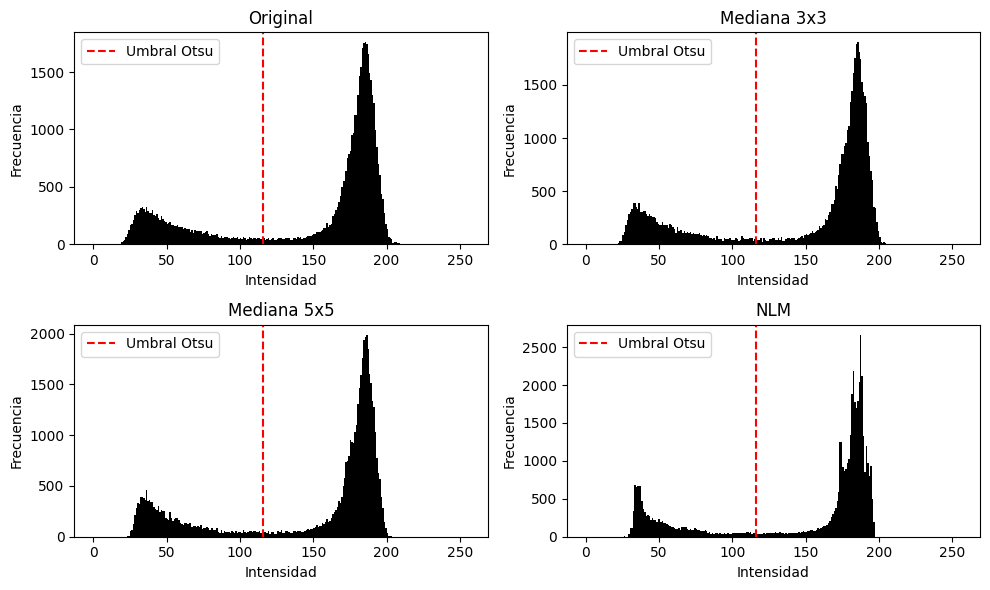

In [ ]:
plt.figure(figsize=(10, 6))

for i, (title, img) in enumerate({
    'Original': gray,
    'Mediana 3x3': mediana3,
    'Mediana 5x5': mediana5,
    'NLM': nlm
}.items()):
    plt.subplot(2, 2, i+1)
    plt.hist(img.ravel(), bins=256, range=(0, 256), color='black')
    plt.axvline(threshold_otsu(img), color='red', linestyle='--', label='Umbral Otsu')
    plt.title(f'{title}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.legend()

plt.tight_layout()
plt.show()
